# 1.2 kNN Classification Model (Social_Network_Ads)

In this tutorial, you will be building a simple classifier using K-NN model that will attempt to classify whether a person  will purchase our product when targeted by social network advertisements

## Importing the libraries

In [ ]:
!pip install pandas-profiling
!pip install ipywidgets

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
# df = pd.read_csv('./data/Social_Network_Ads.csv')
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1_VLG-QVuEQFaABcsXxWmG1ASV-SVcEoEvoFDH8pUN4A/gviz/tq?tqx=out:csv&sheet=Social_Network_Ads')

In [3]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
from ydata_profiling import ProfileReport
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Visualising the dataset

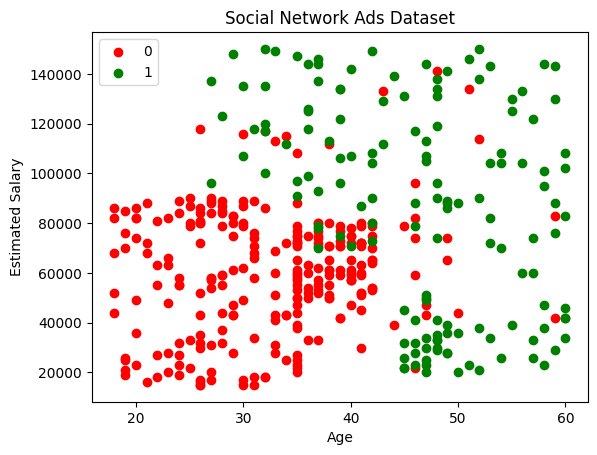

In [5]:
X = df[["Age","EstimatedSalary"]]
y = df["Purchased"]

plt.scatter(X[y == 0]["Age"], X[y == 0]["EstimatedSalary"], c = 'red', label = 0)
plt.scatter(X[y == 1]["Age"], X[y == 1]["EstimatedSalary"], c = 'green', label = 1)
plt.title('Social Network Ads Dataset')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Feature Scaling

- Person 1: (20, 20000)
- Person 2: (20, 20500)
- Person 3: (80, 20000)

Who's more "similar" to Person 1? Person 2 or Person 3?
We would like `dist(Person 1, Person 2)` < `dist(Person 1, Person 3)`

Currently:
- `dist(Person 1, Person 2)` = `sqrt((20 - 20)^2 + (20500 - 20000)^2)` = 500
- `dist(Person 1, Person 3)` = `sqrt((80 - 20)^2 + (20000 - 20000)^2)` = 60

But 500 is not less than 60 like we desire, since both variables are in different scales.

We can see that we need to perform "Feature Scaling".

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print('mean: ' + str(X.mean(axis=0)))
print('std: ' + str(X.std(axis=0)))

mean: [-7.10542736e-17 -1.77635684e-17]
std: [1. 1.]


## TODO: Splitting the dataset into the Training set and Test set

Use 70%-30% training-testing ratio

In [7]:
from sklearn.model_selection import train_test_split

## TODO: Training the K-NN model on the Training set

Pick your choice of neighbors, but do try multiple values

In [8]:
from sklearn.neighbors import KNeighborsClassifier

## TODO: Predicting the Test set results

## TODO: Plotting the Confusion Matrix

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

## Visualising the Training set/Test set results

Below are some codes to visualize the training and test set results. **This takes approximately 10 minutes to run.**

### Training Set result

In [11]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')), vmin=0, vmax=1)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
colors=['red','green']
for i in y_set.unique():
    plt.scatter(X_set[y_set == i, 0], X_set[y_set == i, 1], c = colors[i], label = i)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Test set result

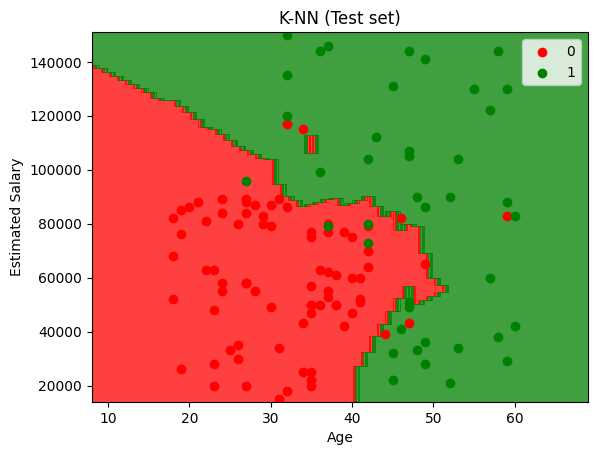

In [20]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')), vmin=0, vmax=1)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i in y_set.unique():
    plt.scatter(X_set[y_set == i, 0], X_set[y_set == i, 1], c = colors[i], label = i)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Predicting New Data

In [21]:
print(classifier.predict(sc.transform([[10,120000]])))

[0]
